# Un Ejemplo con Transformadas de Fourier

Empecemos generando una serie de datos aleatorios, para esto utilizaremos la función **random** de numpy:

Text(0.5, 0, 'Número de Muestra')

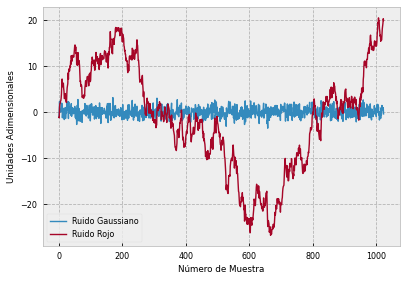

In [7]:
import numpy
import scipy
from matplotlib import pyplot as plt

ndata = 1024
serie = numpy.random.normal(size=ndata)
serie2 = numpy.cumsum(serie)

plt.style.use("seaborn-paper")
plt.plot(serie, label = "Ruido Gaussiano")
plt.plot(serie2, label = "Ruido Rojo")
plt.legend(loc="best")
plt.ylabel("Unidades Adimensionales")
plt.xlabel("Número de Muestra")


Existen varias funciones que nos permiten calcular la Transformada de Fourier (TF):

In [8]:
fserie = numpy.fft.fft(serie)
fserie2 = numpy.fft.fft(serie2)
fserie_scipy = scipy.fft.fft(serie)
fserie_scipy2 = scipy.fft.fft(serie2)


Recordemos que la TF de una secuencia de números reales es un conjunto de valores complejos, por lo cual tenemos que analizar la parte real y la parte imaginaria

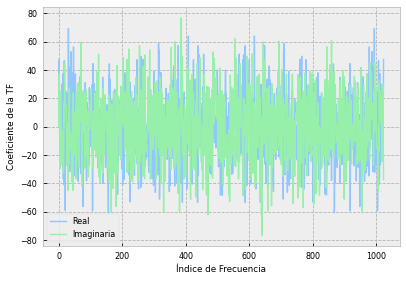

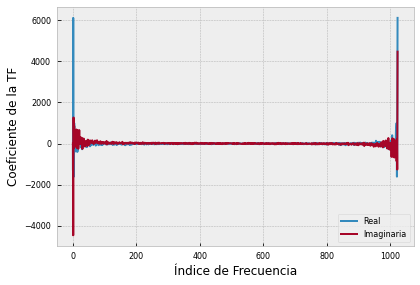

In [9]:
plt.style.use("seaborn-pastel")
plt.plot(fserie.real, label="Real")
plt.plot(fserie.imag, label="Imaginaria")
plt.ylabel("Coeficiente de la TF")
plt.xlabel("Índice de Frecuencia")
plt.legend()
plt.figure()
plt.style.use("bmh")
plt.plot(fserie2.real, label="Real")
plt.plot(fserie2.imag, label="Imaginaria")
plt.ylabel("Coeficiente de la TF")
plt.xlabel("Índice de Frecuencia")
plt.legend()

O bien podemos usar la representación de amplitud y fase: $$x+iy = \sqrt{x^2+y^2} e^{i\arctan(y/x)},$$ donde empleamos la fórmula de Euler: $$e^{i\theta}= \cos(\theta)+i\sin(\theta)$$ 

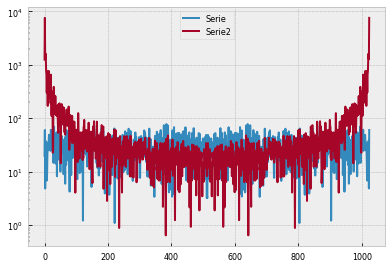

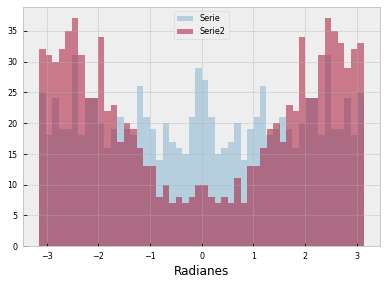

In [10]:
plt.plot(abs(fserie), label="Serie")
plt.plot(abs(fserie2), label="Serie2")
plt.yscale("log")
plt.legend()

plt.figure()
plt.hist(numpy.angle(fserie), alpha=0.3, bins=50, label="Serie")
plt.hist(numpy.angle(fserie2), alpha=0.5, bins=50, label="Serie2")
plt.xlabel("Radianes")
plt.legend()

Antes de continuar, recordemos algunas definiciones:

Sea $f(x)$ una función no-periodica perteneciente a la familia $\mathcal{L}^2$ (cuadrado integrable). Se define la TF como la integral: 
$$ F(\omega)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(x) e^{-2\pi i\omega x}dx,$$
donde $x$ se le conoce como la variable **directa** (tiempo, coordenada espacial, temperatura) y $\omega$ es la variable **recíproca**. El argumento de la exponencial debe de ser adimensional, por lo tanto las unidades de $\omega$ son las inversas de $x$.

En la computadora empleamos la versión discreta de la transformada de Fourier (DFT), para una secuencia de $N$ puntos separados uniformemente:

$$\omega_k=\mathcal{DFT}\lbrace x_n\rbrace = \frac{1}{\sqrt{N}} \sum_{n=0}^{N-1} x_n e^{-2i\pi kn/N}.$$

Consideramos que aproximamos la TF con la DFT: 
$$\begin{array} \mathcal{F}(\omega)&\simeq& \frac{1}{\sqrt{2\pi}} \sum_{n=0}^{N-1} f(n \Delta x) e^{-2i\pi k\Delta\omega n\Delta x} \Delta x\\
          &\simeq& \sqrt{\frac{N}{2\pi}}\mathcal{DFT}\lbrace x_n\rbrace\Delta x
\end{array}$$

Ahora pongamos la información de la variable directa y la variable recíproca. Supongamos que nuestros datos tienen una separación de $\Delta x = 0.1\,s$

Text(0.5, 0, 'Tiempo (s)')

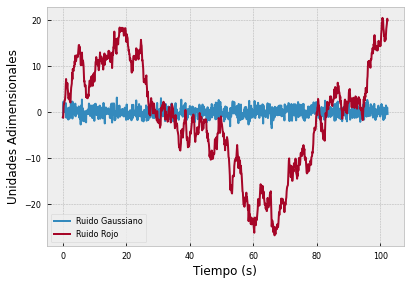

In [11]:
delta_x = 0.1
time = numpy.arange(ndata)*delta_x
plt.plot(time,serie, label = "Ruido Gaussiano")
plt.plot(time,serie2, label = "Ruido Rojo")
plt.legend(loc="best")
plt.ylabel("Unidades Adimensionales")
plt.xlabel("Tiempo (s)")

Definimos la frecuencia de muestreo como $f_s=\frac{1}{\Delta x}$. Ahora los valores de la variable recíproca los encontramos con la funcion **fftfreq**:

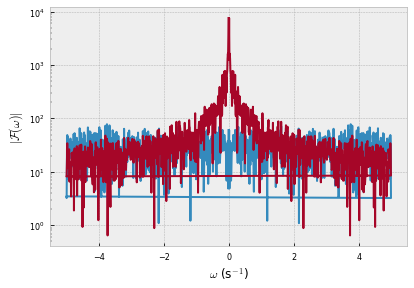

In [12]:
omega = numpy.fft.fftfreq(ndata,d=delta_x)

plt.plot(omega,abs(fserie), label ="Ruido Gaussiano")
plt.plot(omega, abs(fserie2), label = "Ruido Rojo")
plt.xlabel("$\\omega$ (s$^{-1}$)")
plt.ylabel("$|\\mathcal{F} (\omega) |$")
plt.yscale("log")

El rango en frecuencia en nuestra transformada es [$-f_N, f_N$], donde $f_N$ es la **Frecuencia de Nysquist** y se define como $$f_N = \frac{1}{2}f_s = \frac{1}{2\Delta x}.$$

**Trivia** ¿Por qué necesitamos valores de frecuencia positivos y negativos?

En cuanto a la frecuencia fundamental la encontramos mediante la expresión: $$\Delta \omega = \frac{1}{N\Delta x} = \frac{f_s}{N} $$

In [15]:
print ("Frecuencia de muestreo {} Hz".format(delta_x**-1))
print ("Frecuencia de Nyquist Analítica {} Hz".format((delta_x**-1)/2))
print ("Frecuencia de Nyquist Numérica {:.2} Hz".format(omega.max()))
print ("Frecuencia de Fundamental Analítica {:.2} Hz".format((delta_x**-1)/ndata))
print ("Frecuencia de Fundamental Numérica {:.2} Hz".format(omega[omega>0].min()))

Frecuencia de muestreo 10.0 Hz
Frecuencia de Nyquist Analítica 5.0 Hz
Frecuencia de Nyquist Numérica 5.0 Hz
Frecuencia de Fundamental Analítica 0.0098 Hz
Frecuencia de Fundamental Numérica 0.0098 Hz


## Espectro de potencia

Los coeficientes de la TF nos muestra la relevancia de cada frecuencia dentro de la señal o imagen que estamos analizando. El espectro de potencia se define como: $$ \mathcal {P}(\omega) = \lvert \mathcal{F}(\omega) \rvert^2. $$ Esta cantidad esta relacionada con la ***energía*** que contiene una señal: $$ E = \int_{-\infty}^{\infty} \lvert f(x) \rvert^2 \mathrm{d}x =\int_{-\infty}^{\infty} \lvert \mathcal{F}(\omega) \rvert^2 \mathrm{d}\omega $$

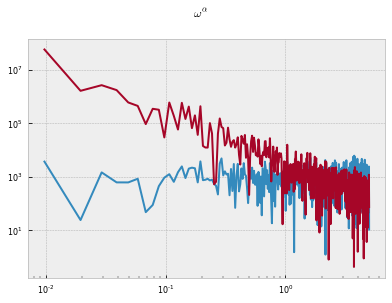

In [20]:
spec = abs(fserie)**2
spec2 = abs(fserie2)**2

plt.plot(omega[omega>0], spec[omega>0], label="Espectro Gaussiano")
plt.plot(omega[omega>0], spec2[omega>0], label="Espectro Ruido Rojo")
plt.suptitle ("$\\omega^\\alpha$")
plt.yscale("log")
plt.xscale("log")

### Ejemplo 

El archivo **lmt\_pulsos\_201709.dat** contiene  180 segundos de
observación del pulsar GFM-1085. La primera columna es el tiempo en segundos. La segunda
columna es la intensidad del pulsar y la tercera columna es la intensidad
del pulsar observado en peores condiciones atmosféricas. Las unidades de la intensidad son Jy/sr.

* Hacer un diagrama de intensidad frente al tiempo para las dos diferentes observaciones.
* Calcular a partir del uso de Transformadas de Fourier el espectro de potencias, y los periodos de pulsación del objeto.

Para la solución emplearemos la versión de la TF para números reales (**rfft**)

In [21]:
fft = numpy.fft

time, sgood, sbad = numpy.loadtxt("lmt_pulsos_201709.txt", unpack = True)

dx = time[1]-time[0]
N = len(time)

freq = fft.rfftfreq(N,dx)
f_M = 1.0/dx
w_0 = freq[1]

print ("Frecuencia de Muestreo: %.2f Hz"%f_M)
print ("Frecuencia de Nyquist: %.2f Hz"%(f_M/2))
print ("Frecuencia Fundamental: %.4f Hz"%w_0)


Frecuencia de Muestreo: 8.00 Hz
Frecuencia de Nyquist: 4.00 Hz
Frecuencia Fundamental: 0.0056 Hz


Ahora graficamos:

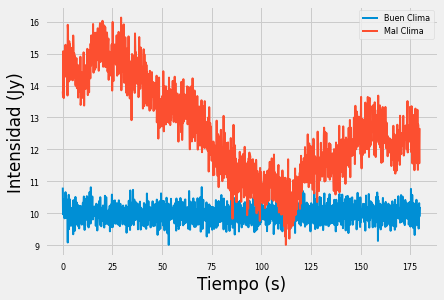

In [22]:
plt.style.use("fivethirtyeight")

plt.plot(time,sgood, label="Buen Clima", lw=2)
plt.plot(time,sbad, label="Mal Clima", lw=2)
plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel("Intensidad (Jy)")
plt.tight_layout()

Ahora obtenemos la TF y el espectro de potencia. Nótese que empleamos la definición de la ecuación (5):

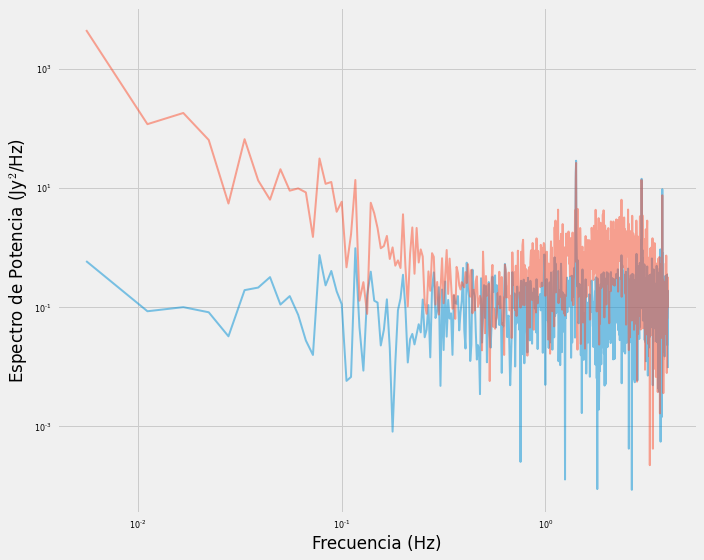

In [25]:
norm = dx/(2*numpy.pi)**0.5

FG = fft.rfft(sgood)*norm
FB = fft.rfft(sbad)*norm

plt.figure(figsize=(10,8))
plt.plot(freq[1:],abs(FG[1:])**2, lw=2, alpha = 0.5)
plt.plot(freq[1:],abs(FB[1:])**2,lw=2, alpha = 0.5)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Espectro de Potencia (Jy$^2$/Hz)")
plt.xlabel("Frecuencia (Hz)")

plt.tight_layout()

Aquí conviene decir que esta forma de estimar el espectro se le llama **periodograma** y que no es conveniente estimar el espectro de potencia por las siguientes razones:
 1. Incrementar el número de muestras **no** disminuye en ruido en la estimación del espectro: **Solución:** Utilizar el **método de Welch**
 2. Puede sufrir de una alta contaminación o fuga espectral (pobre localización espectral) **Solución** Usar una ventana para minimizar este efecto.

Ahora estimamos el espectro con el método de Welch:


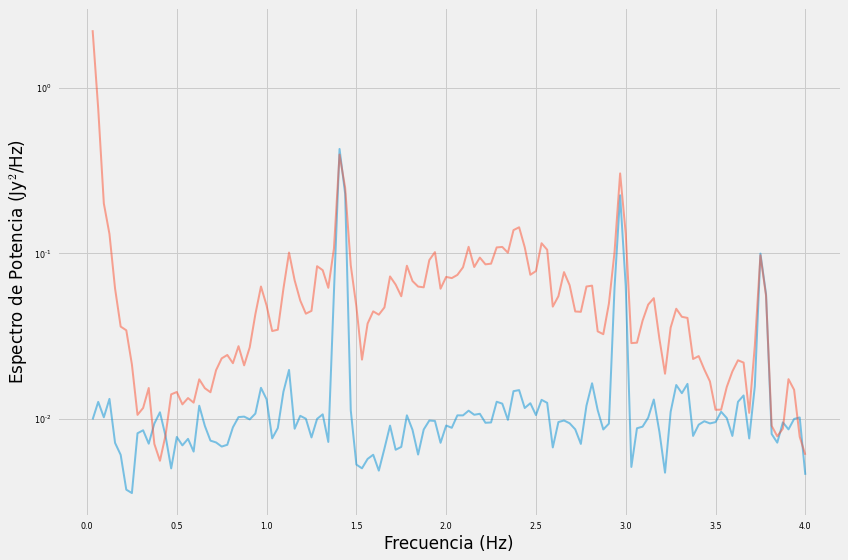

In [26]:
from scipy import signal as sig

fg,spg = sig.welch(sgood,fs = dx**-1)
fb,spb = sig.welch(sbad,fs = dx**-1)


plt.figure(figsize=(12,8))
plt.plot(fg[1:],spg[1:], lw=2, alpha = 0.5)
plt.plot(fb[1:],spb[1:],lw=2, alpha = 0.5)
plt.yscale("log")

plt.ylabel("Espectro de Potencia (Jy$^2$/Hz)")
plt.xlabel("Frecuencia (Hz)")

plt.tight_layout()

El ruido disminuyó significativamente y ahora se notan "picos" en $\simeq 1.5, 3.0, 3.7 \mathrm{Hz}$. Estos picos representan eventos periódicos (es decir que se pueden representar sinusoidales).

**Trivia** ¿Qué perdimos con este método?

Ahora, calculemos el espectro con una función de ventana:

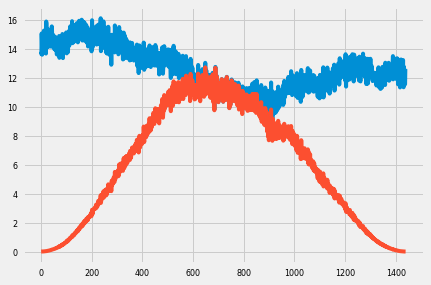

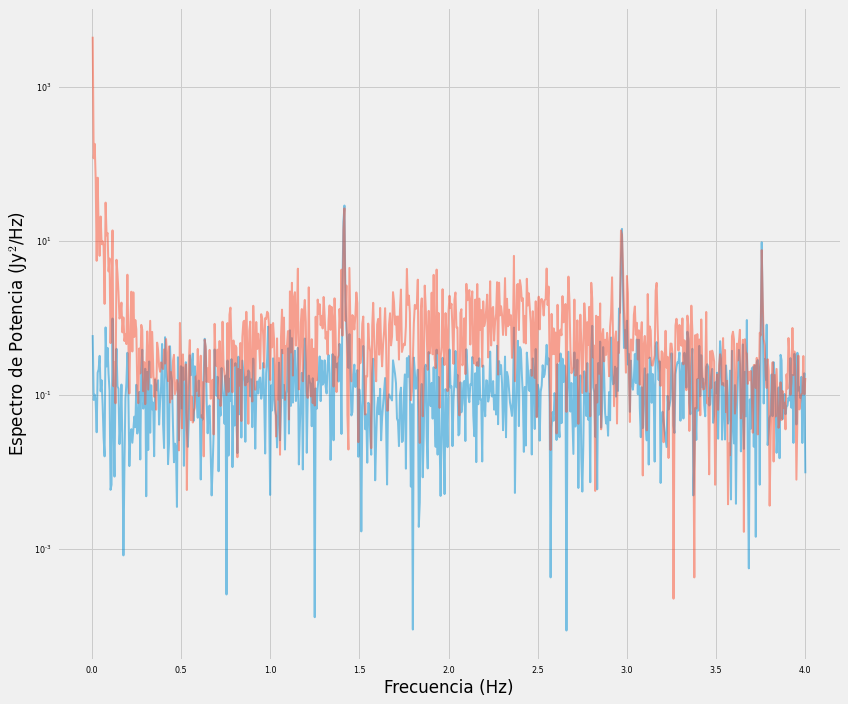

In [29]:
window = sig.hann(N)
plt.figure()
plt.plot(sbad)
plt.plot(sbad*window)

FGw = fft.rfft(sgood*window)*norm
FBw = fft.rfft(sbad*window)*norm

plt.figure(figsize=(12,10))
plt.plot(freq[1:],abs(FG[1:])**2, lw=2, alpha = 0.5)
plt.plot(freq[1:],abs(FB[1:])**2,lw=2, alpha = 0.5)
plt.yscale("log")
plt.ylabel("Espectro de Potencia (Jy$^2$/Hz)")
plt.xlabel("Frecuencia (Hz)")
plt.tight_layout()

## Convolución y Filtrado

Una de las aplicaciones de la TF consiste en simplificar el cálculo de la convolución de dos funciones:

$$\mathcal{F}\lbrace (f\odot g)(x) \rbrace  = F(\omega)G(\omega),$$

donde $\odot$ es el operador de convolución y se define mediante:

$$(f\odot g)(x)=\int_{-\infty}^{\infty} f(x)g(x-\tau)\mathrm{d}\tau.$$

La convolución se puede usar para eliminar alguas frecuencias que no son de interés para nuestro análisis. A este procedimiento se le conoce como filtrado. Veamos un ejemplo, carguemos una imagen desde un archivo fits



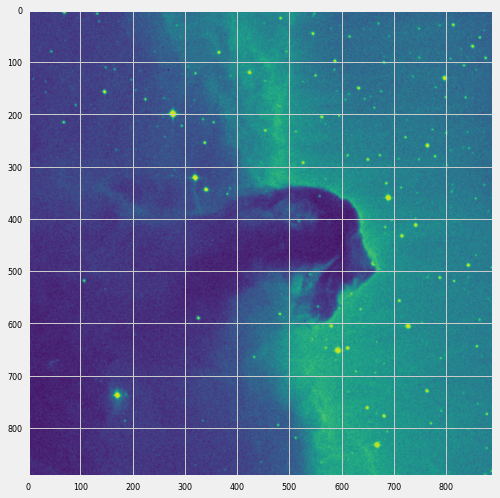

In [30]:
from astropy.io import fits

fitsfile = fits.open("HorseHead.fits")

data = fitsfile[0].data
plt.figure(figsize=(8,8))
plt.imshow (data)

Ahora calculemos su TF con la función **fft2**

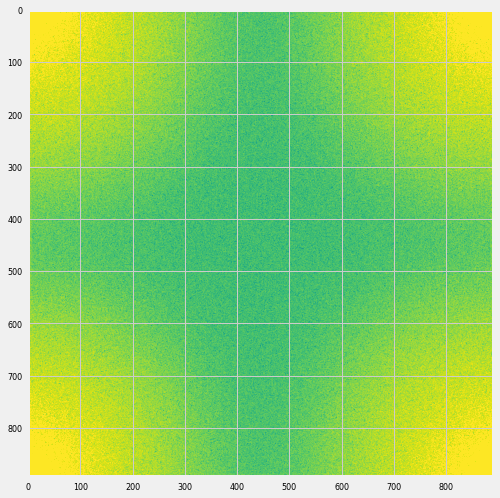

In [31]:
fdata = fft.fft2(data)
spec_data = abs(fdata)
plt.figure(figsize=(8,8))
plt.imshow (numpy.log10(spec_data), vmax = numpy.percentile(numpy.log10(spec_data),95))

¿Cómo entendemos la gráfica anterior. Primero hagamos un desplazamiento de las frequencias:

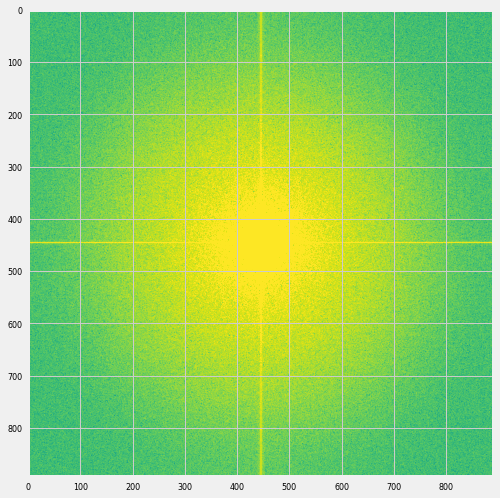

In [32]:
data_plot = fft.fftshift(fdata)
spec_plot = abs(data_plot)
plt.figure(figsize=(8,8))
plt.imshow (numpy.log10(spec_plot), vmax = numpy.percentile(numpy.log10(spec_plot),95))


En esta visualización las frecuencias mas bajas están hacia el centro de la imagen (escalas mas grandes) y las frecuencias mas altan se localizan hacia las orillas de la misma. 

Ahora eliminemos las frecuencias mas altas. 

Text(0, 0.5, 'Frecuencia Normalizada $\\omega_y$')

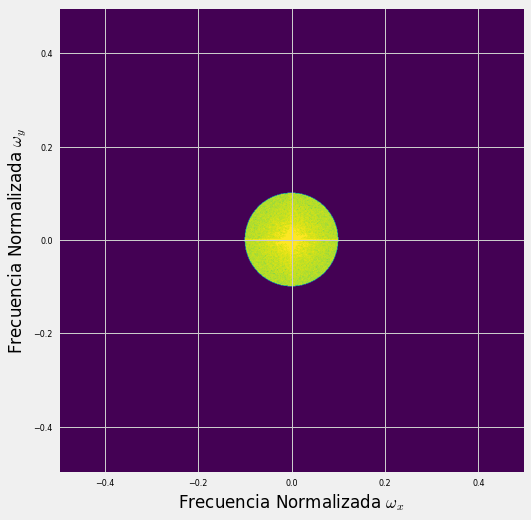

In [37]:
#Frecuencia normalizada en x, y
fx = fft.fftfreq(data.shape[0])
fy = fft.fftfreq(data.shape[1])

#Matriz de coordenadas en frecuencia
fx2,fy2 = numpy.meshgrid (fx,fy)
fx2 = fx2.T
fy2 = fy2.T

fr = numpy.sqrt(fx2**2+fy2**2)

fdata_lp = fdata.copy()
fdata_lp [fr > 0.1] *= 0

data_plot = fft.fftshift(fdata_lp)
spec_plot = abs(data_plot)
plt.figure(figsize=(8,8))
plt.imshow (numpy.log1p(spec_plot), \
            vmax = numpy.percentile(numpy.log1p(spec_plot[spec_plot>0]),95),\
            extent=[fx.min(),fx.max(), fy.min(), fy.max()])
plt.xlabel ("Frecuencia Normalizada $\omega_x$")
plt.ylabel ("Frecuencia Normalizada $\omega_y$")

Ahora para obtener la imagen filtrada necesitamos la inversa de la TF (IFT): $$ f(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty F(\omega) e^{2\pi i\omega x}\mathrm{d}\omega.$$ De igual manera la aproximamos con la versión discreta de la IFT: $$f(x)\simeq \cfrac{\Delta \omega \sqrt{N}}{\sqrt{2\pi}} \mathcal{IDFT} \lbrace \omega_k\rbrace$$.

Text(0.5, 1.0, 'Filtrada (Pasa Bajas)')

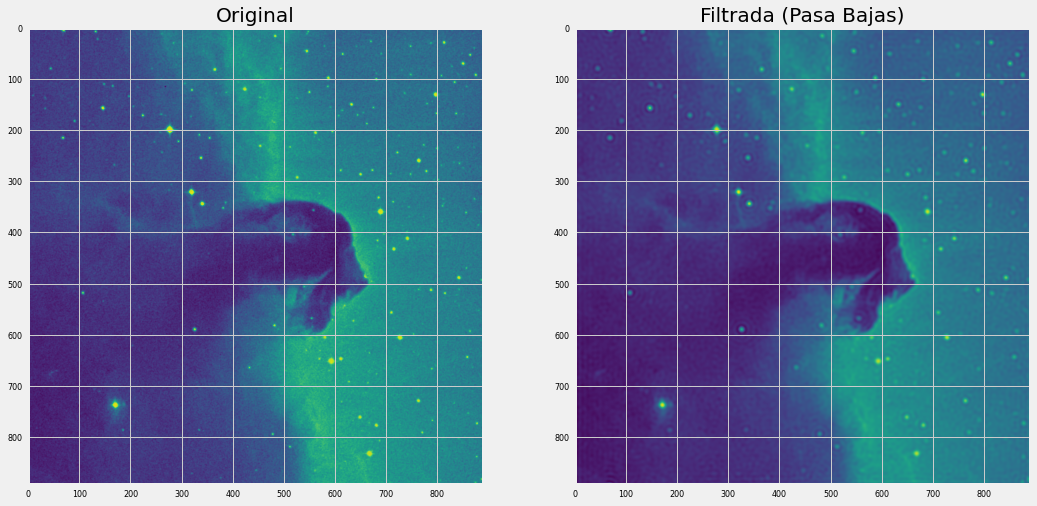

In [38]:
idata = fft.ifft2(fdata_lp)
idata = idata.real
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(data)
ax[0].set_title("Original")
ax[1].imshow(idata)
ax[1].set_title("Filtrada (Pasa Bajas)")

Ahora quitemos las frecuencias mas bajas

Text(0.5, 1.0, 'Filtrada (Pasa Bajas)')

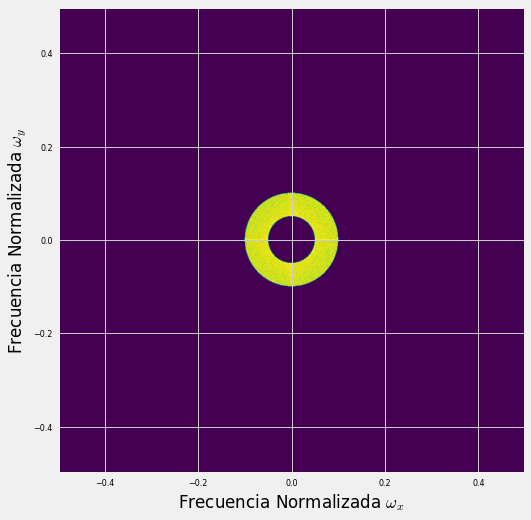

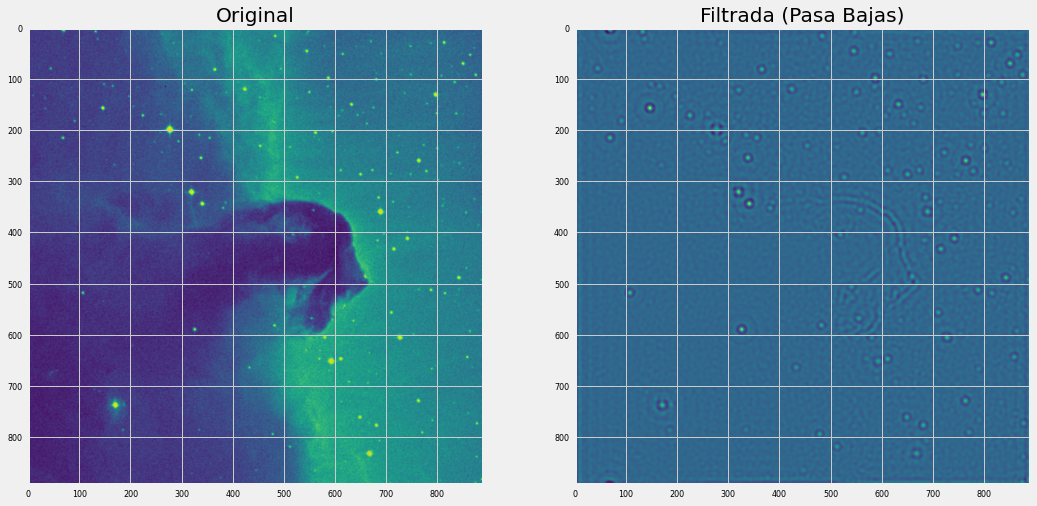

In [43]:
fdata_hp = fdata.copy()
fdata_hp [(fr > 0.1) | (fr < 0.05)] *= 0

data_plot = fft.fftshift(fdata_hp)
spec_plot = abs(data_plot)
plt.figure(figsize=(8,8))
plt.imshow (numpy.log1p(spec_plot), \
            vmax = numpy.percentile(numpy.log1p(spec_plot[spec_plot>0]),95),\
            extent=[fx.min(),fx.max(), fy.min(), fy.max()])
plt.xlabel ("Frecuencia Normalizada $\omega_x$")
plt.ylabel ("Frecuencia Normalizada $\omega_y$")

idata = fft.ifft2(fdata_hp)
idata = idata.real
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(data)
ax[0].set_title("Original")
ax[1].imshow(idata)
ax[1].set_title("Filtrada (Pasa Bajas)")